# 자연어 처리

* 설치 목록
    * JDK (Java SE Downloads)
    * JAVA_HOME 설정
    * C++ 빌드툴 (community version)
    * JPype 설치 (https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
    * KoNLPy 설치
    * Word Cloud 설치
    * nltk 설치 (import nltk; nltp.down())
    * gensim 설치
    * scikit-learn 설치

## 1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : ** whl 파일로 설치** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA_HOME 설정 

## 2. 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('요', 'Eomi'),
 ('~~', 'Punctuation')]

## 3. 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [3]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [4]:
text = open('09. alice.txt').read()
alice_mask = np.array(Image.open('09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [5]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 
    
%matplotlib inline

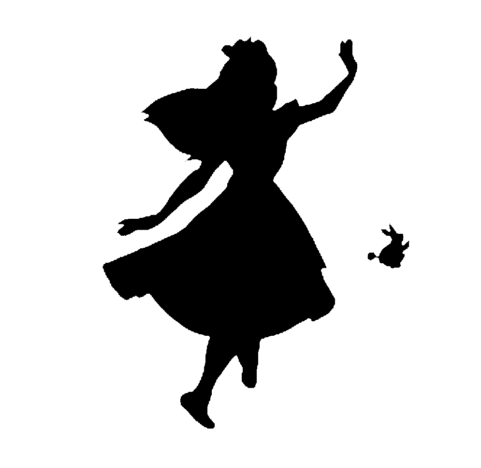

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_


{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

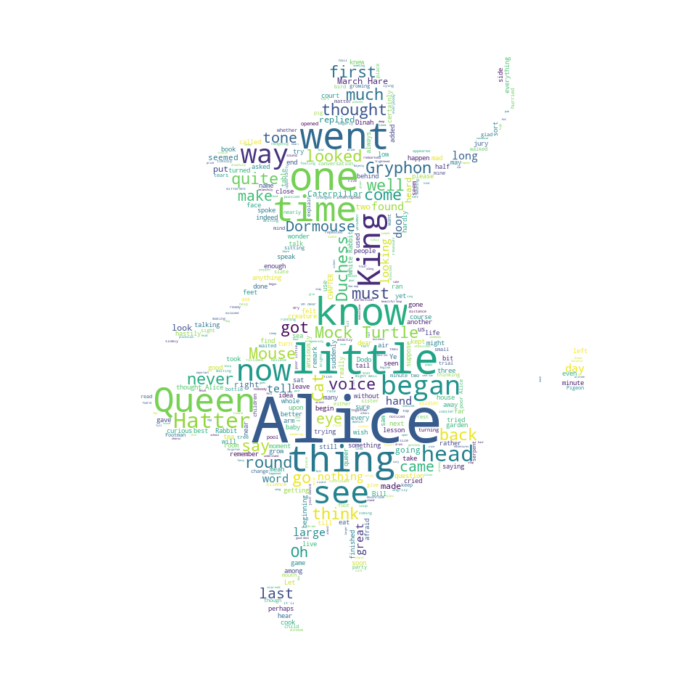

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
text = open('./data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('09. stormtrooper_mask.png'))

In [11]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [14]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

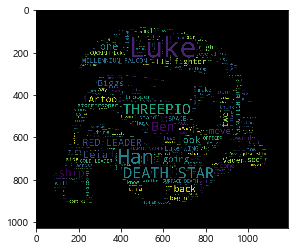

In [17]:
plt.imshow(wc)

In [13]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

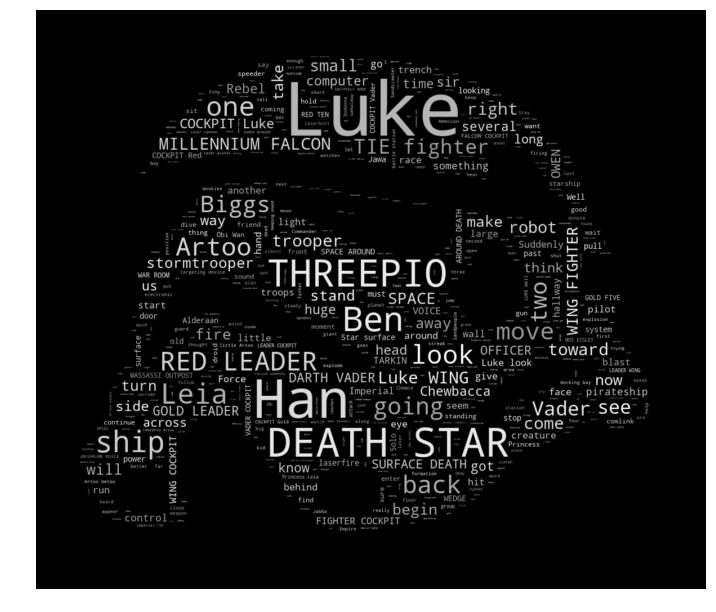

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()